In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('nike_labelled_data.csv')

In [6]:
df_cleaned = df[(df.select_dtypes(include=[np.number]) >= 0).all(axis=1)].copy()

In [7]:
df_cleaned["High_Sales"] = (df_cleaned["Sale Quantity"] >= 800).astype(int)

In [29]:
df_cleaned.to_csv('NB_data.csv')

In [8]:
features = df_cleaned.drop(columns=["High_Sales", "Title", "Subtitle", "Color", "Color Description", "Badge", "Dominant Color"])
labels = df_cleaned["High_Sales"]

In [9]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(features)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.3, random_state=42)


In [20]:
X_train

array([[0.28185082, 0.4137931 , 0.59183673, ..., 0.33333333, 0.441     ,
        0.        ],
       [0.08052881, 0.12068966, 0.59183673, ..., 0.88888889, 0.303     ,
        0.        ],
       [0.14763614, 0.22413793, 0.6122449 , ..., 1.        , 0.936     ,
        1.        ],
       ...,
       [0.21474348, 0.31034483, 0.57142857, ..., 0.55555556, 0.375     ,
        0.        ],
       [0.29191692, 0.51724138, 0.79591837, ..., 0.55555556, 0.289     ,
        0.        ],
       [0.12414858, 0.20689655, 0.69387755, ..., 0.11111111, 0.264     ,
        0.        ]])

In [11]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
mnb_report = classification_report(y_test, mnb_pred, output_dict=True)

In [12]:
mnb_report

{'0': {'precision': 0.829512893982808,
  'recall': 0.9897435897435898,
  'f1-score': 0.9025720966484801,
  'support': 585},
 '1': {'precision': 0.9469026548672567,
  'recall': 0.47345132743362833,
  'f1-score': 0.6312684365781711,
  'support': 226},
 'accuracy': 0.8458692971639951,
 'macro avg': {'precision': 0.8882077744250323,
  'recall': 0.731597458588609,
  'f1-score': 0.7669202666133257,
  'support': 811},
 'weighted avg': {'precision': 0.8622257003451821,
  'recall': 0.8458692971639951,
  'f1-score': 0.8269683640025,
  'support': 811}}

In [13]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_pred = bnb.predict(X_test)
bnb_report = classification_report(y_test, bnb_pred, output_dict=True)

In [14]:
bnb_report

{'0': {'precision': 0.9181034482758621,
  'recall': 0.7282051282051282,
  'f1-score': 0.8122020972354623,
  'support': 585},
 '1': {'precision': 0.5417867435158501,
  'recall': 0.831858407079646,
  'f1-score': 0.6561954624781849,
  'support': 226},
 'accuracy': 0.7570900123304563,
 'macro avg': {'precision': 0.7299450958958561,
  'recall': 0.7800317676423871,
  'f1-score': 0.7341987798568237,
  'support': 811},
 'weighted avg': {'precision': 0.8132359078618514,
  'recall': 0.7570900123304563,
  'f1-score': 0.7687279918653703,
  'support': 811}}

In [15]:
X_train_gnb, X_test_gnb, _, _ = train_test_split(features, labels, test_size=0.3, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train_gnb, y_train)
gnb_pred = gnb.predict(X_test_gnb)
gnb_report = classification_report(y_test, gnb_pred, output_dict=True)

In [16]:
gnb_report

{'0': {'precision': 0.9519867549668874,
  'recall': 0.9829059829059829,
  'f1-score': 0.9671993271656855,
  'support': 585},
 '1': {'precision': 0.9516908212560387,
  'recall': 0.8716814159292036,
  'f1-score': 0.909930715935335,
  'support': 226},
 'accuracy': 0.9519112207151664,
 'macro avg': {'precision': 0.951838788111463,
  'recall': 0.9272936994175932,
  'f1-score': 0.9385650215505102,
  'support': 811},
 'weighted avg': {'precision': 0.9519042876195978,
  'recall': 0.9519112207151664,
  'f1-score': 0.951240380016414,
  'support': 811}}

In [40]:
print("MultinomialNB Training Set Sample:\n")
print(X_train)

MultinomialNB Training Set Sample:

[[0.28185082 0.4137931  0.59183673 ... 0.33333333 0.441      0.        ]
 [0.08052881 0.12068966 0.59183673 ... 0.88888889 0.303      0.        ]
 [0.14763614 0.22413793 0.6122449  ... 1.         0.936      1.        ]
 ...
 [0.21474348 0.31034483 0.57142857 ... 0.55555556 0.375      0.        ]
 [0.29191692 0.51724138 0.79591837 ... 0.55555556 0.289      0.        ]
 [0.12414858 0.20689655 0.69387755 ... 0.11111111 0.264      0.        ]]


In [41]:
print("BernoulliNB Training Set Sample:\n")
print(X_train)

BernoulliNB Training Set Sample:

[[0.28185082 0.4137931  0.59183673 ... 0.33333333 0.441      0.        ]
 [0.08052881 0.12068966 0.59183673 ... 0.88888889 0.303      0.        ]
 [0.14763614 0.22413793 0.6122449  ... 1.         0.936      1.        ]
 ...
 [0.21474348 0.31034483 0.57142857 ... 0.55555556 0.375      0.        ]
 [0.29191692 0.51724138 0.79591837 ... 0.55555556 0.289      0.        ]
 [0.12414858 0.20689655 0.69387755 ... 0.11111111 0.264      0.        ]]


In [42]:
print("GaussianNB Training Set Sample:\n")
print(X_train_gnb)

GaussianNB Training Set Sample:

       Price  Initial Price  Discount (%)  Discount Amount  Discount Flag  \
1586  105.97            150            29            44.03              1   
555    45.97             65            29            19.03              1   
1461   65.97             95            30            29.03              1   
2707   40.00             40             0             0.00              0   
1001   85.00             85             0             0.00              0   
...      ...            ...           ...              ...            ...   
1638   84.97            120            29            35.03              1   
1095  130.00            130             0             0.00              0   
1130   85.97            120            28            34.03              1   
1294  108.97            180            39            71.03              1   
860    58.97             90            34            31.03              1   

      Price Category  Color Diversity Scor

In [32]:
features.to_csv('GNB_data.csv',index=False)

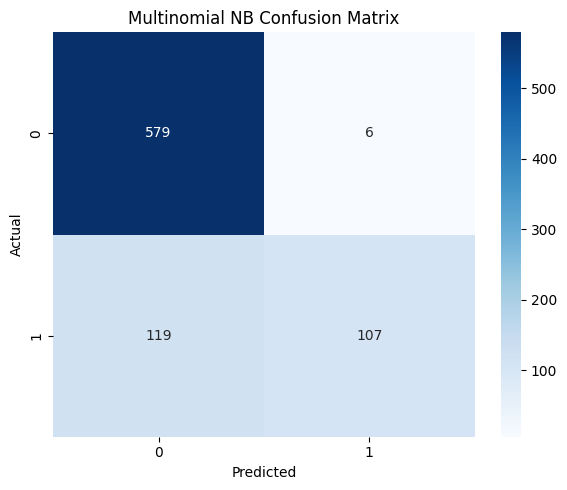

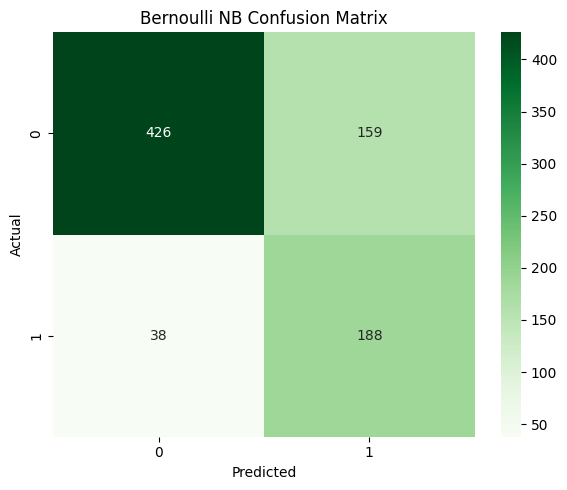

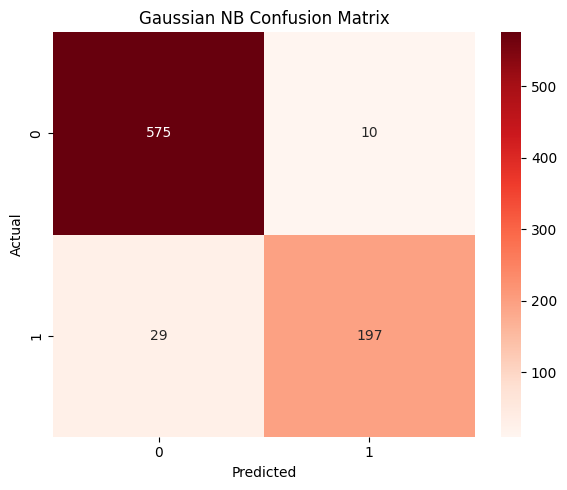

In [35]:
# Predictions
y_pred_mnb = mnb.predict(X_test)
y_pred_bnb = bnb.predict(X_test)
y_pred_gnb = gnb.predict(X_test_gnb)

# Confusion Matrices
mnb_conf_matrix = confusion_matrix(y_test, y_pred_mnb)
bnb_conf_matrix = confusion_matrix(y_test, y_pred_bnb)
gnb_conf_matrix = confusion_matrix(y_test, y_pred_gnb)

# Multinomial NB
plt.figure(figsize=(6, 5))
sns.heatmap(mnb_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Multinomial NB Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Bernoulli NB
plt.figure(figsize=(6, 5))
sns.heatmap(bnb_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Bernoulli NB Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Gaussian NB
plt.figure(figsize=(6, 5))
sns.heatmap(gnb_conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Gaussian NB Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()